In [1]:
import sys
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
sys.path.append('..')

In [4]:
from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA, ConditionalPLSA

In [5]:
csv_file = '../data/Full-Economic-News-DFE-839861.csv'
directory = '../data/blogs'

In [6]:
pipeline = Pipeline(*DEFAULT_PIPELINE)
pipeline

Pipeline:
0: remove_non_ascii
1: to_lower
2: remove_numbers
3: tag_remover
4: punctuation_remover
5: tokenize
6: pos_tag
7: LemmatizeWords
8: RemoveStopwords
9: short_word_remover

In [ ]:
corpus = Corpus.from_xml(directory, pipeline)
corpus

In [7]:
corpus = Corpus.from_csv(csv_file, pipeline)
corpus

Corpus:
Number of documents: 1000
Number of words:     6431

In [8]:
n_topics = 5

In [9]:
conditional_plsa = ConditionalPLSA(corpus, n_topics, True)
conditional_result = conditional_plsa.fit()
conditional_plsa

ConditionalPLSA:
Number of topics:     5
Number of documents:  1000
Number of words:      6431
Number of iterations: 68

In [10]:
visualize = Visualize(conditional_result)
visualize

Visualize:
Number of topics:    5
Number of documents: 5
Number of words:     6431

In [ ]:
plsa = PLSA(corpus, n_topics, True)
plsa_result = plsa.fit()
plsa

In [ ]:
visualize = Visualize(plsa_result)
visualize

<IPython.core.display.Javascript object>


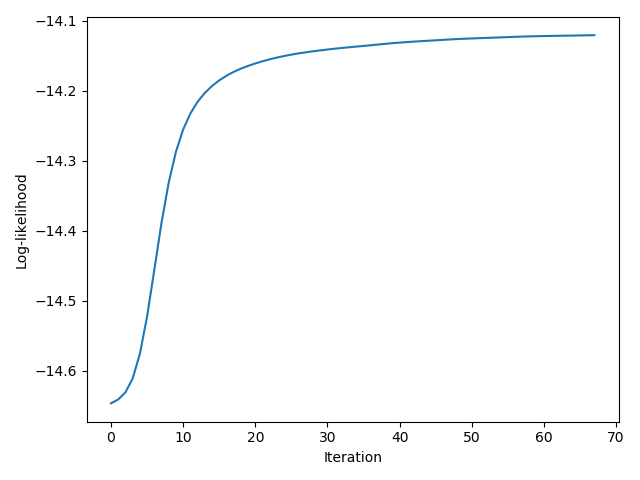

In [11]:
fig, ax = plt.subplots()
_ = visualize.convergence(ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


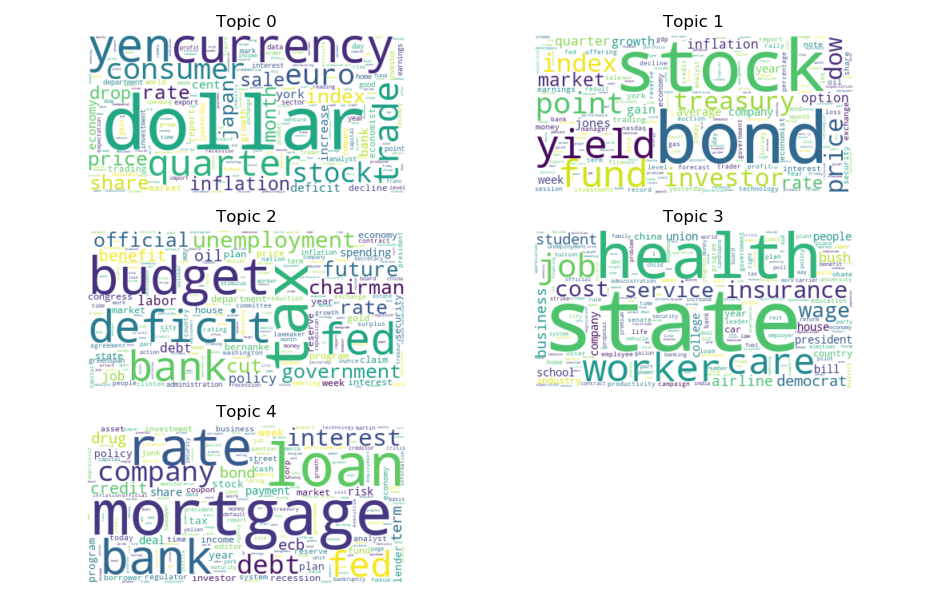

In [12]:
fig = plt.figure(figsize=(9.4, 6))
visualize.wordclouds(fig)

<IPython.core.display.Javascript object>


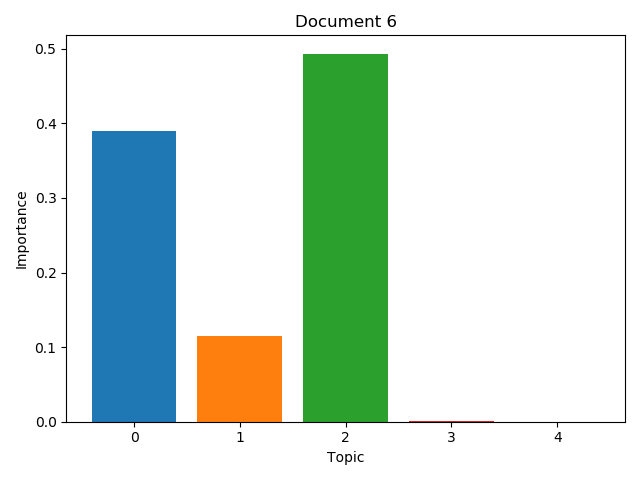

In [13]:
fig, ax = plt.subplots()
_ = visualize.topics_in_doc(6, ax)
fig.tight_layout()